In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
titanic = sns.load_dataset('titanic')
titanic.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
440,1,2,female,45.0,1,1,26.250,S,Second,woman,False,NaN,Southampton,yes,False
750,1,2,female,4.0,1,1,23.000,S,Second,child,False,NaN,Southampton,yes,False
777,1,3,female,5.0,0,0,12.475,S,Third,child,False,NaN,Southampton,yes,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
y = titanic['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [8]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
feature_list = ['pclass', 'sex', 'age']
X = titanic[feature_list]
X

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [10]:
X['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# LabelEncoder().fit_transform(X['sex'])
X['sex'] = le.fit_transform(X['sex'])
X

/tmp/ipykernel_5412/3506765386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = le.fit_transform(X['sex'])


,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [12]:
X['age'].isnull().sum()

177

In [13]:
X['age'].fillna(X['age'].mean(), inplace=True)

/tmp/ipykernel_5412/66500479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)
/tmp/ipykernel_5412/66500479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].mean(), inplace=True)


In [14]:
X['age'].isnull().sum()

0

In [15]:
X.tail()

,pclass,sex,age
886,2,1,27.000000
887,1,0,19.000000
888,3,0,29.699118
889,1,1,26.000000
890,3,1,32.000000


In [16]:
from sklearn.preprocessing import LabelBinarizer

X2 = pd.DataFrame(LabelBinarizer().fit_transform(X['pclass']), columns=['c1', 'c2', 'c3'], index=X.index)
X2

,c1,c2,c3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [17]:
X = pd.concat([X, X2], axis=1)
X

,pclass,sex,age,c1,c2,c3
0,3,1,22.000000,0,0,1
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,1
3,1,0,35.000000,1,0,0
4,3,1,35.000000,0,0,1
...,...,...,...,...,...,...
886,2,1,27.000000,0,1,0
887,1,0,19.000000,1,0,0
888,3,0,29.699118,0,0,1
889,1,1,26.000000,1,0,0


In [18]:
X.drop(columns=['pclass'], axis=1, inplace=True)

In [19]:
X

,sex,age,c1,c2,c3
0,1,22.000000,0,0,1
1,0,38.000000,1,0,0
2,0,26.000000,0,0,1
3,0,35.000000,1,0,0
4,1,35.000000,0,0,1
...,...,...,...,...,...
886,1,27.000000,0,1,0
887,0,19.000000,1,0,0
888,0,29.699118,0,0,1
889,1,26.000000,1,0,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 5), (268, 5), (623,), (268,))

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [22]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
#graphviz 설치
!sudo apt-get update
!sudo apt-get  install -y graphviz

In [27]:
from IPython.display import Image# for visualizing the tree
import pydotplus
 
# 의사 결정 나무를 시각화하기 위해서 라이브러리를 임포트합니다.
from sklearn.tree import export_graphviz

In [28]:
# 시각화를 위한 함수를 작성한다.
def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    print(graph)
    graph.write_png(png_file_to_save)
    return Image(graph.create_png())

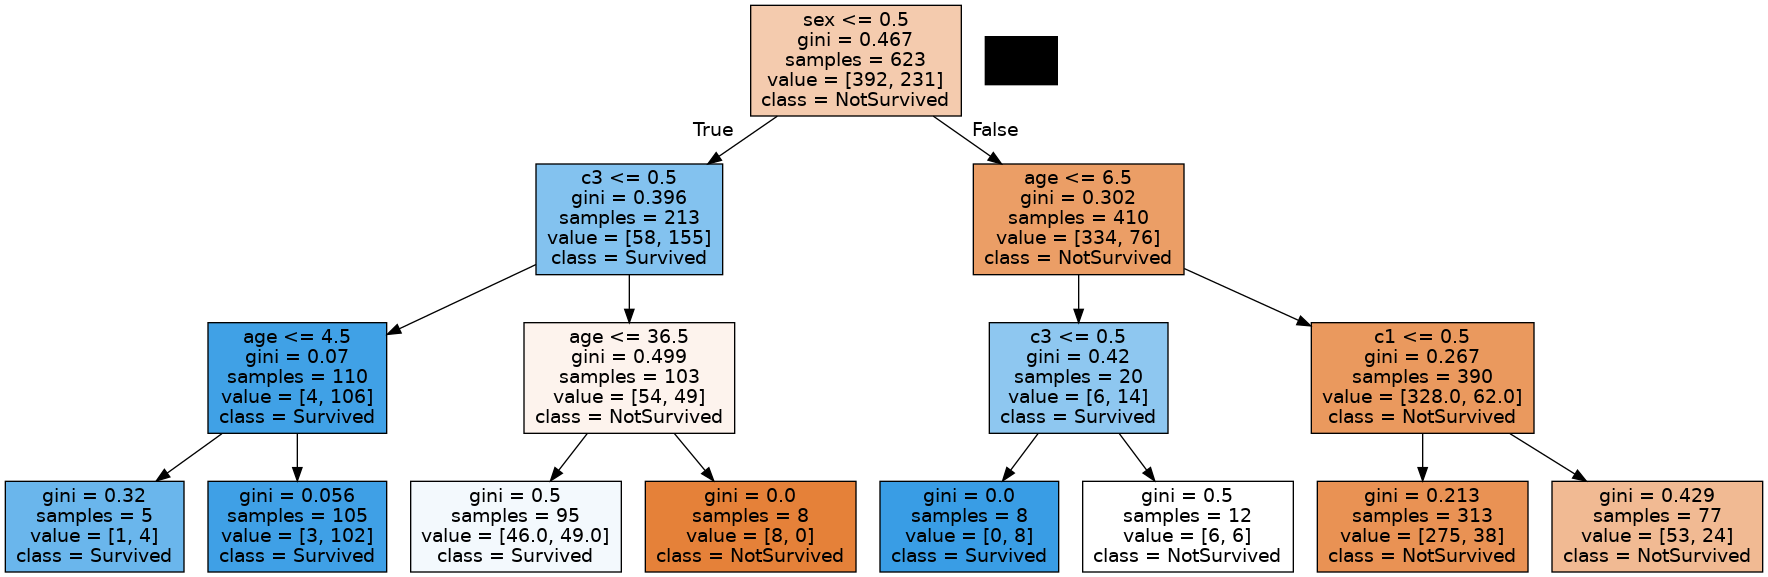

In [30]:
tree_graph_to_png(tree=model, feature_names=X.columns.values, class_names=['NotSurvived', 'Survived'], png_file_to_save='decision_tree.png')

In [34]:
pd.crosstab(y_test, y_pred, margins=True) 

col_0,0,1,All
survived,,,
0,138,19,157
1,33,78,111
All,171,97,268


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred)

0.8059701492537313

In [32]:
# 혼돈행렬 지표 정밀도 재현율 f1점수
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [33]:
from sklearn import metrics

y_test_proba = model.predict_proba(X_test)[:,1]

metrics.roc_curve(y_test, y_test_proba)
metrics.roc_auc_score(y_test, y_test_proba)

0.8557124002983876

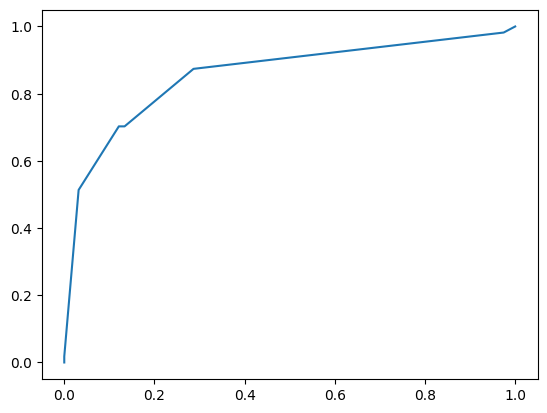

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.show()

### 나이를 Min Max로 정규화하면

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc_minmax = MinMaxScaler()
X['age'] = sc_minmax.fit_transform(X[['age']])
X

,sex,age,c1,c2,c3
0,1,0.271174,0,0,1
1,0,0.472229,1,0,0
2,0,0.321438,0,0,1
3,0,0.434531,1,0,0
4,1,0.434531,0,0,1
...,...,...,...,...,...
886,1,0.334004,0,1,0
887,0,0.233476,1,0,0
888,0,0.367921,0,0,1
889,1,0.321438,1,0,0


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 5), (268, 5), (623,), (268,))

In [59]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [61]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)